In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Temperature-Salinity Plots
Temperature-Salinity (TS) diagrams provide information on water masses. Density is a function of these two parameters, and tracking changes in TS over time and/or depth can show if a new water mass has been encountered. 
<img src = https://upload.wikimedia.org/wikipedia/commons/5/5a/T-S_Diagram_showing_Water_Mass_Locations.png width = 500>

Today, we will be pulling temperature and salinity data from 10 different cruises in the North Pacific. First, we will write a function to clean the data. Next, we will write a function to plot our diagrams. 

# Grab the data from URLs
The data is stored in a GitHub repository, and the cruise files are organized by name and instrument. We will manipulate the strings to pull each cruise from the path. 

In [11]:
# helper function to clean up data
def clean_data(cruise_url):
    # create the path
    path = f'{main_url}/{cruise_url}'
    # read in data
    df = pd.read_csv(path, sep = '\t')
    # add cruise column name
    cruise_name = cruise_url.split('_')[0]
    df['cruise'] = cruise_name
    return df

In [12]:
# main path
main_url = "https://raw.githubusercontent.com/seaflow-uw/seaflow-sfl/refs/heads/master/curated"
cruises = ['HOT301_740.sfl', 'KM1713_740.sfl', 'SCOPE_6_740.sfl', 'KM1906_740.sfl', 'SCOPE_16_751.sfl',
          'MGL1704_740.sfl', 'TN397_130_130.sfl', 'TN412_130_130.sfl', 'TN412_130_130.sfl', 'RR2106_751.sfl']

# loop through to clean up
all_dfs = []
for cruise in cruises:
    # clean up dataset
    df = clean_data(cruise) 
    all_dfs.append(df)

# Create TS plots from cleaned data

In [13]:
# helper function to plot
def plot_TS(df):
    fig, axs = plt.subplots()
    # talk about setting vmin/vmax and depends on question asked
    g = axs.scatter(df.SALINITY, df['OCEAN TEMP'], alpha = .8, c = df['LAT'], cmap = 'viridis', 
                    vmin = -18, vmax = 56)
    cbar = plt.colorbar(g, label='Latitude')
    # set title
    axs.set_title(df['cruise'].loc[0])
    # add labels
    axs.set_xlabel('Salinity (PSU)')
    axs.set_ylabel('Temperature (ºC)')
    # can also set x and y lims- discuss why
    plt.show()

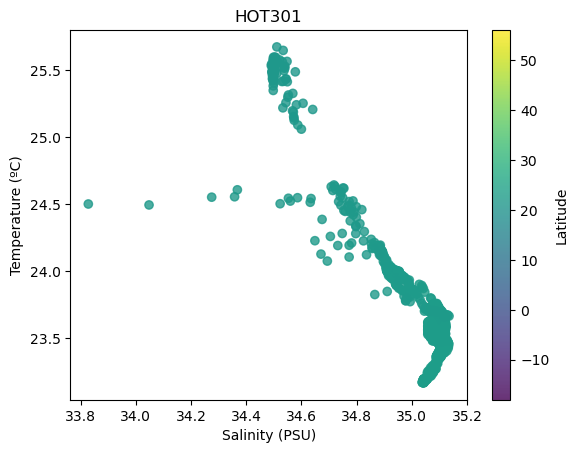

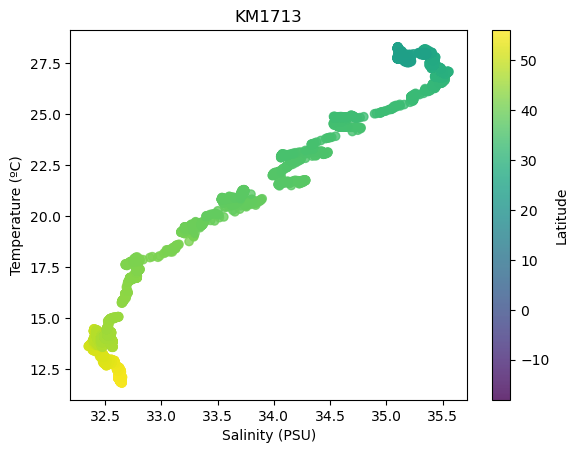

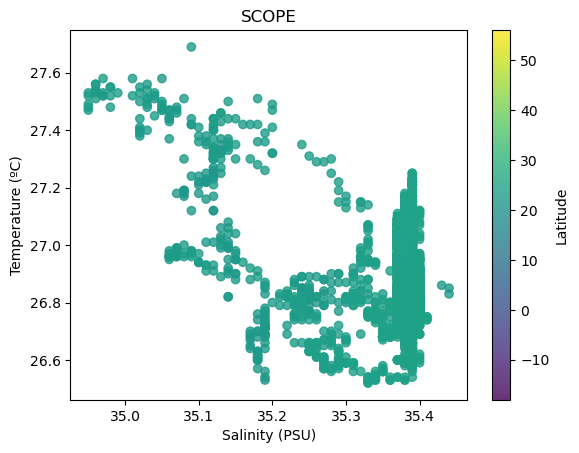

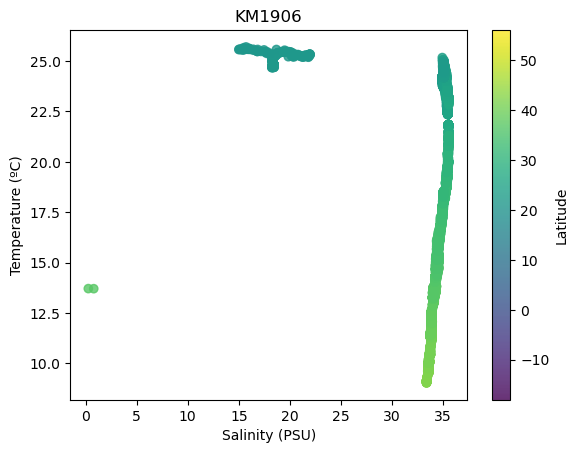

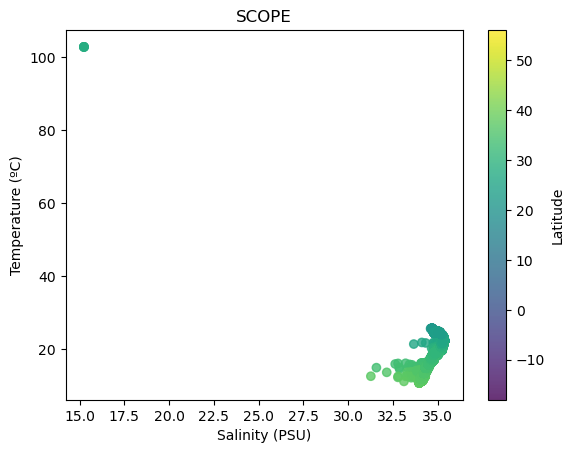

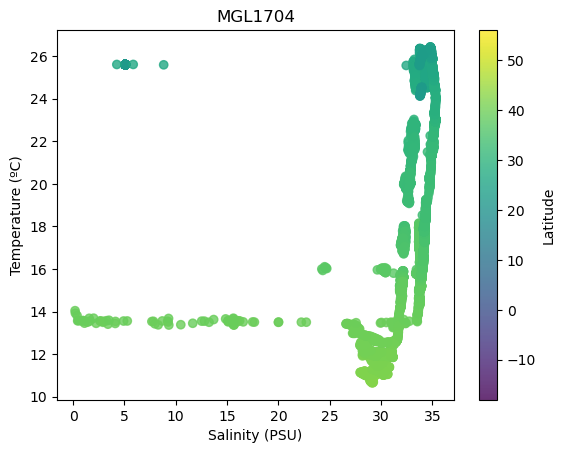

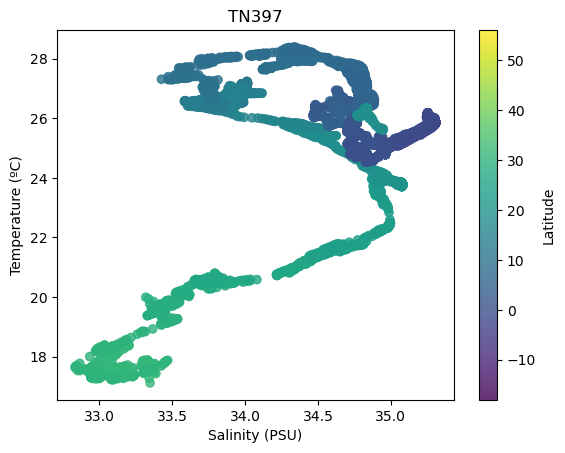

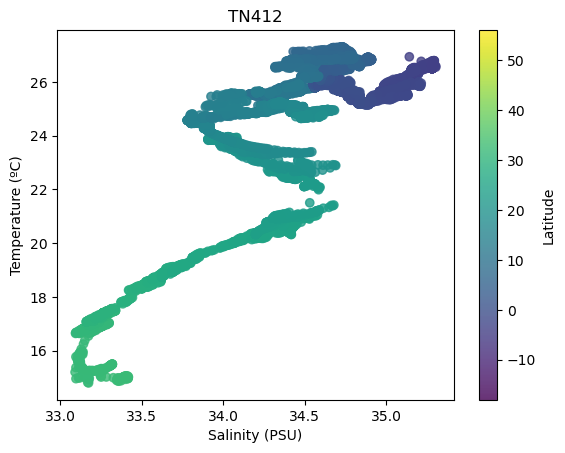

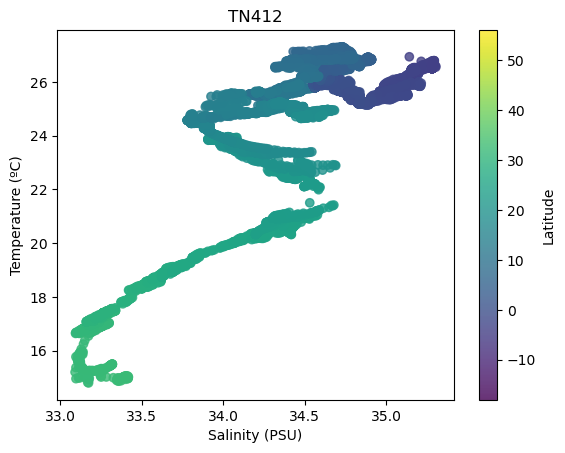

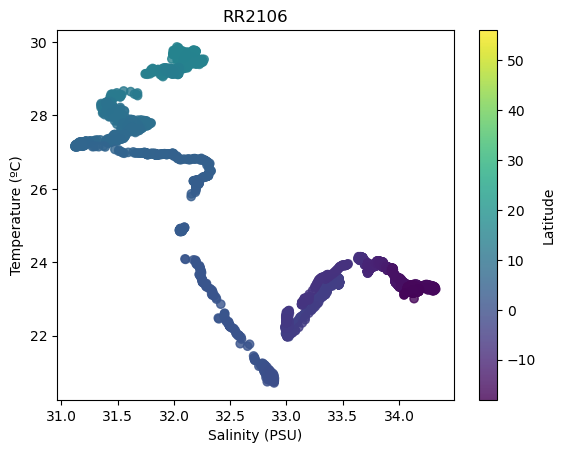

In [14]:
# plot
for df in all_dfs:
    plot_TS(df)